In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
class SGD:
    def __init__(self, lr=0.01):
        self.lr=lr

    def update(self, params, grads):
        for key in params.keys():
            params[key]-=self.lr*grads[key]

In [ ]:
class Momentum:
    def __init__(self, lr=0.01, momentum=0.9):
        self.lr=lr
        self.momentum=momentum
        self.v=None

    def update(self, params, grads):
        if self.v is None:
            self.v={}
            for key, val in params.items():
                self.v[key]=np.zeros_like(val)

        for key in params.keys():
            self.v[key]=self.momentum*self.v[key] - self.lr*grads[key]
            params[key]+=self.v[key]

In [ ]:
class AdaGrad:
    def __init__(self, lr=0.01):
        self.lr=lr
        self.h=None

    def update(self, params, grads):
        if self.h is None:
            self.h={}

            for key,val in params.items():
                self.h[key]=np.zeros_like(val)

        for key in params.keys():
            self.h[key]+=grads[key]*grads[key]
            params[key]-=self.lr*grads[key] / (np.sqrt(self.h[key])+1e-7)

In [ ]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

x=np.random.randn(1000,100)
node_num=100
hidden_layer_size=5
activations={}

for i in range(hidden_layer_size):
    if i!=0:
        x=activations[i-1]

    w=np.random.randn(node_num, node_num)+1
    a=np.dot(x,w)
    z=sigmoid(a)
    activations[i]=z

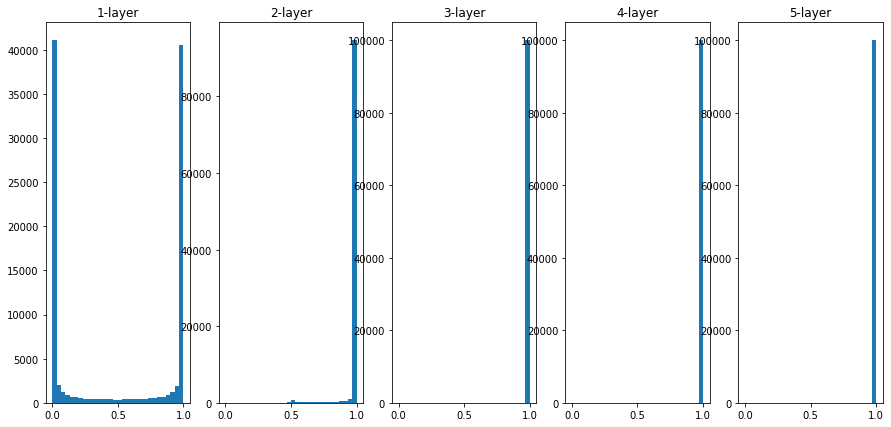

In [ ]:
plt.figure(figsize=(15,7))
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1)+"-layer")
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

In [ ]:
activations={}

for i in range(hidden_layer_size):
    if i!=0:
        x=activations[i-1]

    w=np.random.randn(node_num, node_num)*0.01
    a=np.dot(x,w)
    z=sigmoid(a)
    activations[i]=z

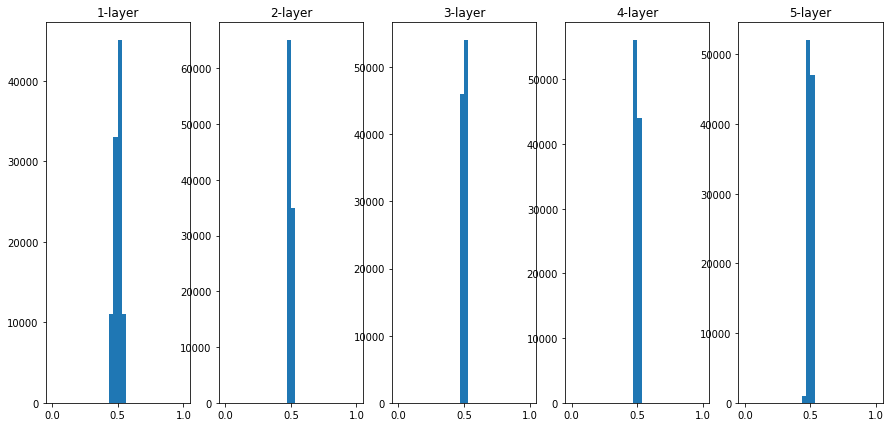

In [ ]:
plt.figure(figsize=(15,7))
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1)+"-layer")
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

In [ ]:
activations={}
node_num=100

for i in range(hidden_layer_size):
    if i!=0:
        x=activations[i-1]

    w=np.random.randn(node_num, node_num) / np.sqrt(node_num)
    a=np.dot(x,w)
    z=sigmoid(a)
    activations[i]=z

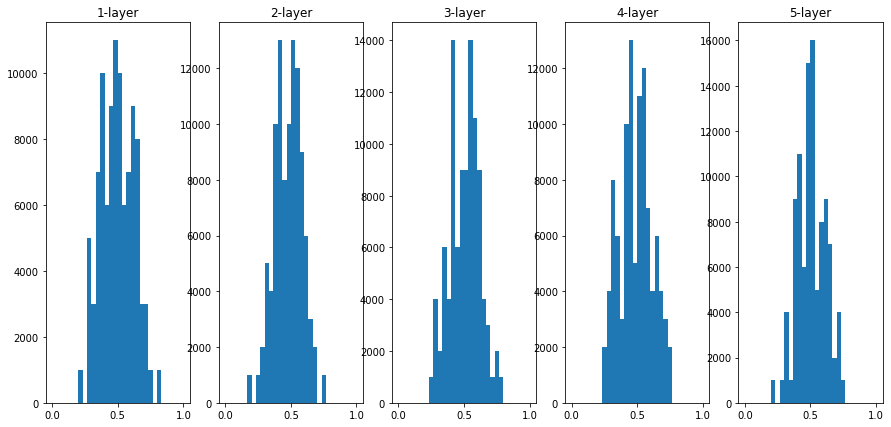

In [ ]:
plt.figure(figsize=(15,7))
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1)+"-layer")
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

In [ ]:
activations={}
node_num=100

for i in range(hidden_layer_size):
    if i!=0:
        x=activations[i-1]

    w=np.random.randn(node_num, node_num) / 4*np.sqrt(node_num)
    a=np.dot(x,w)
    z=sigmoid(a)
    activations[i]=z

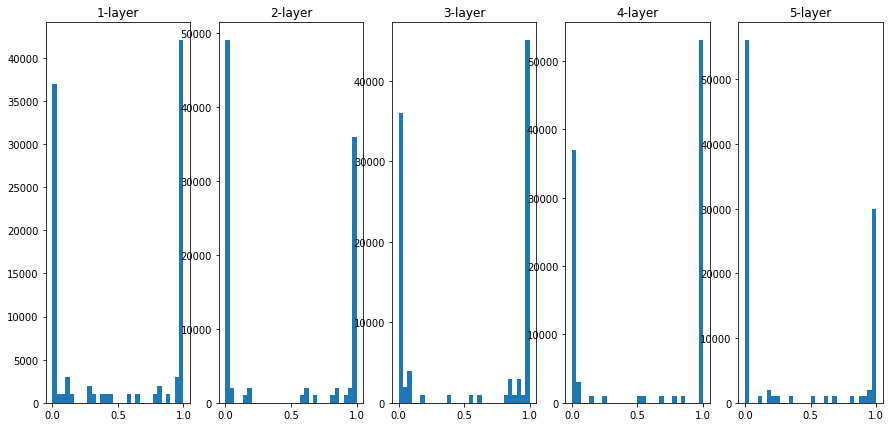

In [ ]:
plt.figure(figsize=(15,7))
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1)+"-layer")
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

In [ ]:
import numpy as np
node_num=10
w=np.random.randn(node_num, node_num)+1
print(w)

[[ 0.95609798  0.02465147  1.56814307  1.78059668  1.3547206   1.44431282
   1.90869503  2.13394347 -0.2485731  -0.26264097]
 [-1.2156753   2.01757413  0.18579682  0.13542687  1.78120036  1.30536493
   1.90853967  0.93185645  1.51790683  1.9241337 ]
 [ 0.61901223  0.4993841   1.55148063  1.71407085  0.71316289  0.18946694
   0.18240058 -0.59104652  0.49134937  1.09557835]
 [ 1.59180211  1.34497838 -1.15550154  0.50688047 -0.82208862  2.5343513
   0.53987968  0.90574735  1.59882311 -1.33479342]
 [ 3.07173195  1.46285055  1.21657443  2.48894671  0.59241172 -0.00445477
   0.9030895   1.22003443  0.61562702  2.01345358]
 [ 1.21109427  2.06277876  1.70780283  0.86403801  0.08671913  0.81310427
  -0.21430088  1.12135247  2.04681651 -0.21455291]
 [-0.35219203  0.53920937  0.93858995 -0.14546517 -0.37623806 -0.53966785
   3.73797832  0.90144382  2.29780198  1.04584587]
 [ 0.85633774  1.30078028  0.86548995  0.75319871  2.57739598  2.40260445
   1.53891577  0.98392086  1.95978261  2.30857439]
 

In [ ]:
class Dropout:
    def __init__(self, dropout_ratio=0.5):
        self.dropout_ratio=dropout_ratio
        self.mask=None

    def forward(self, x, train_flg=True):
        if train_flg:
            self.mask=np.random.randn(*x.shape) > self.dropout_ratio
            return x*self.mask

        else:
            return x*(1.0-self.dropout_ratio)

    def backward(self, dout):
        return dout*self.mask